In [ ]:

!pip install kmodes


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point
import warnings
from mpl_toolkits.mplot3d import Axes3D
from kmodes.kprototypes import KPrototypes
warnings.filterwarnings("ignore")

In [37]:
beh_data = pd.read_csv("/content/behavioural_dataset.csv")

In [9]:
beh_data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [11]:
beh_data.shape

(99, 8)

In [12]:
beh_data.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'Total Salary', 'Price'],
      dtype='object')

In [13]:
beh_data.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64

In [14]:
beh_data.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
beh_data.rename(columns={'Price':'EV_Price'},inplace=True)
beh_data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


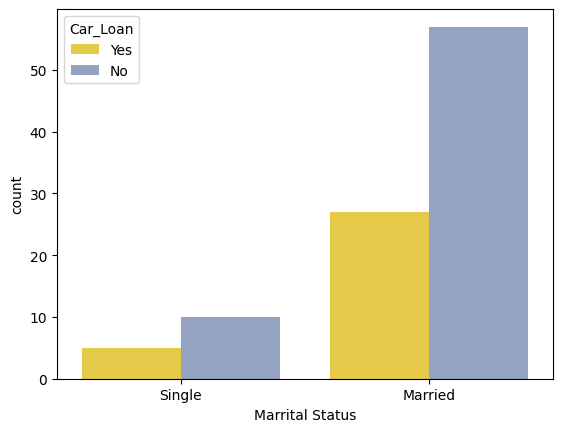

In [15]:
sns.countplot(x ='Marrital Status', hue = 'Car_Loan',  data = beh_data, palette = 'Set2_r')
plt.show()

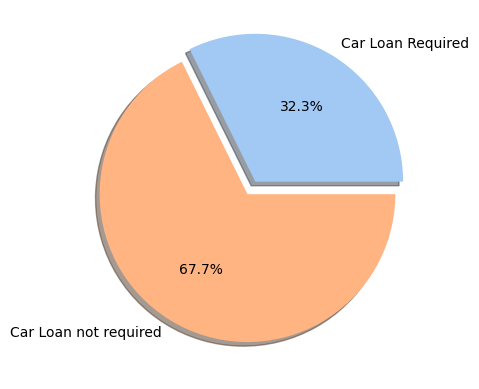

In [16]:
labels = ['Car Loan Required','Car Loan not required']
Loan_status = [beh_data.query('Car_Loan == "Yes"').Car_Loan.count(),beh_data.query('Car_Loan == "No"').Car_Loan.count()]

explode = [0.1, 0]
palette_color = sns.color_palette('pastel')

plt.pie(Loan_status, labels=labels, colors=palette_color, shadow = "True",
        explode=explode, autopct='%1.1f%%')

plt.show()

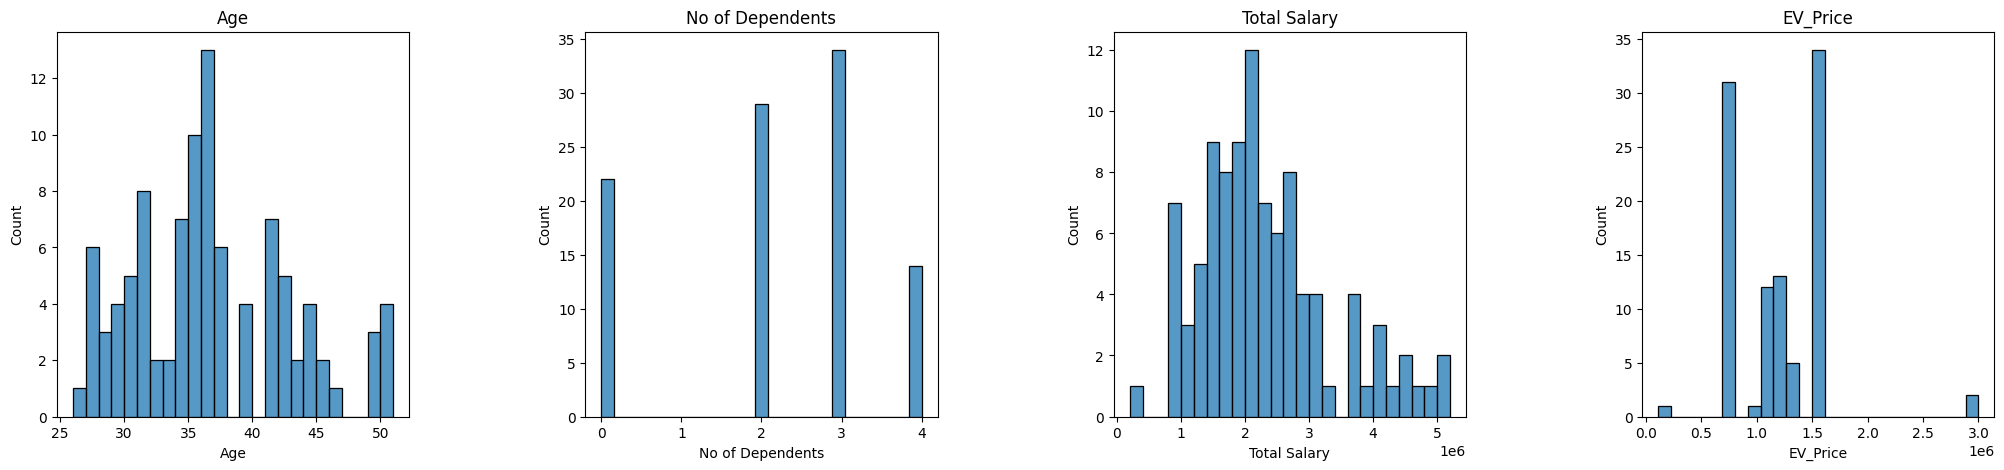

In [17]:
plt.figure(1, figsize=(25,5))
n=0

for x in ['Age', 'No of Dependents' ,'Total Salary'  ,'EV_Price']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(beh_data[x], bins= 25)
  plt.title(f'{x}')
plt.show()

In [18]:
cluster_features = list(beh_data.columns)
cluster_data = beh_data[cluster_features].values

In [19]:
cluster_data[0:3]

array([[27, 'Salaried', 'Single', 'Post Graduate', 0, 'Yes', 800000,
        800000],
       [35, 'Salaried', 'Married', 'Post Graduate', 2, 'Yes', 2000000,
        1000000],
       [45, 'Business', 'Married', 'Graduate', 4, 'Yes', 1800000,
        1200000]], dtype=object)

In [20]:
cluster_data[:, 0] = cluster_data[:, 0].astype(float)
cluster_data[:, 4] = cluster_data[:, 4].astype(float)
cluster_data[:, 6] = cluster_data[:, 6].astype(float)
cluster_data[:, 7] = cluster_data[:, 7].astype(float)


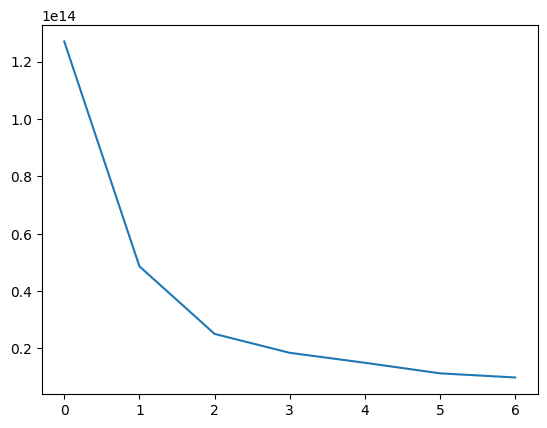

In [21]:
# Finding optimal number of clusters for KPrototypes

cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(cluster_data, categorical=[1,2,3,5])
    cost.append(kproto.cost_)

plt.plot(cost)

In [22]:
# fitting data to clusters

kproto = KPrototypes(n_clusters=2, verbose=2,max_iter=20)
clusters = kproto.fit_predict(cluster_data, categorical=[1,2,3,5])


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 13, ncost: 50140772520396.805
Run: 1, iteration: 2/20, moves: 1, ncost: 50057040964014.66
Run: 1, iteration: 3/20, moves: 1, ncost: 50020391397205.32
Run: 1, iteration: 4/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 31, ncost: 60593966305440.77
Run: 2, iteration: 2/20, moves: 20, ncost: 50447073534650.24
Run: 2, iteration: 3/20, moves: 3, ncost: 50057040964014.66
Run: 2, iteration: 4/20, moves: 1, ncost: 50020391397205.32
Run: 2, iteration: 5/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 4, ncost: 48777842651066.98
Run: 3, iteration: 2/20, moves: 0, ncost: 48777842651066.98
Init: initializing c

In [23]:
beh_data['Cluster'] = clusters

In [24]:
beh_data.EV_Price.mean()

1194040.4040404041

In [25]:
beh_data.EV_Price[beh_data.Cluster==0].mean()


1632142.857142857

In [26]:
print("Max EV price: ",beh_data['EV_Price'][beh_data.Cluster==1].max())
print("Mean ",beh_data.EV_Price[beh_data.Cluster==1].mean())
beh_data['Cluster'].value_counts(normalize=True) * 100

Max EV price:  1600000
Mean  1021267.6056338028


Cluster
1    71.717172
0    28.282828
Name: proportion, dtype: float64

In [27]:
# Segregrating each cluster

Cluster_0 = beh_data[beh_data.Cluster==0]
Cluster_1 = beh_data[beh_data.Cluster==1]

In [28]:
beh_data['Cluster'].value_counts()

Cluster
1    71
0    28
Name: count, dtype: int64

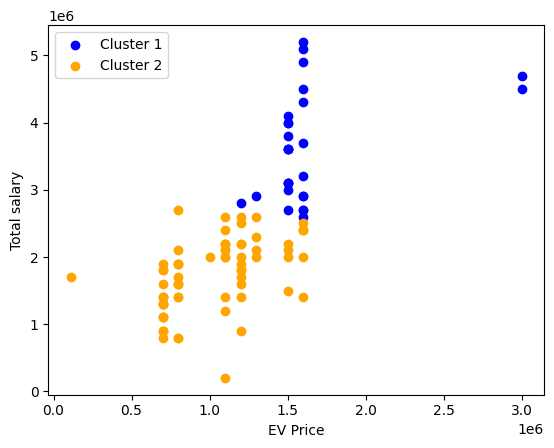

In [29]:
# plotting the effct of salary and ev price on cluster data

plt.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'],color='blue', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],color='orange', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Total salary')
plt.show()

# there is a clear difference in segments when comparing salary and the price of EV purchased

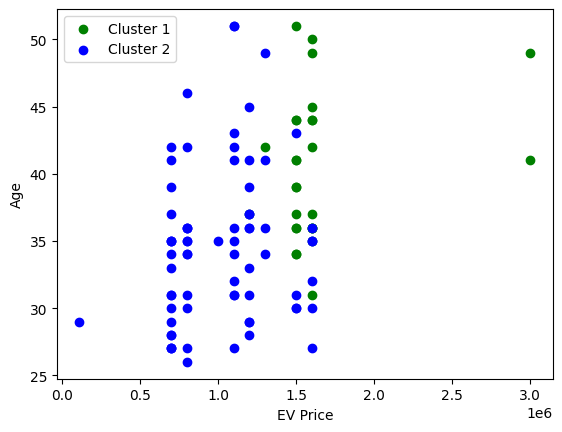

In [30]:
plt.scatter(Cluster_0.EV_Price, Cluster_0['Age'],color='green', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Age'],color='blue', label = 'Cluster 2')
plt.legend(loc = "upper left")

plt.xlabel('EV Price')
plt.ylabel('Age')
plt.show()

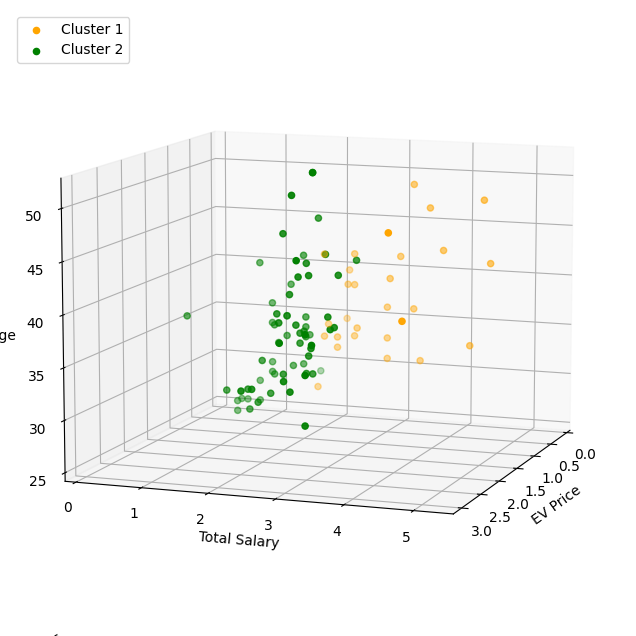

In [31]:
# plotting influence of age

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], Cluster_0['Age'], color='orange', label = 'Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],Cluster_1['Age'], color='green', label = 'Cluster 2')
plt.legend(loc = 'upper left')

ax.view_init(10, 20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('Age')
plt.show()


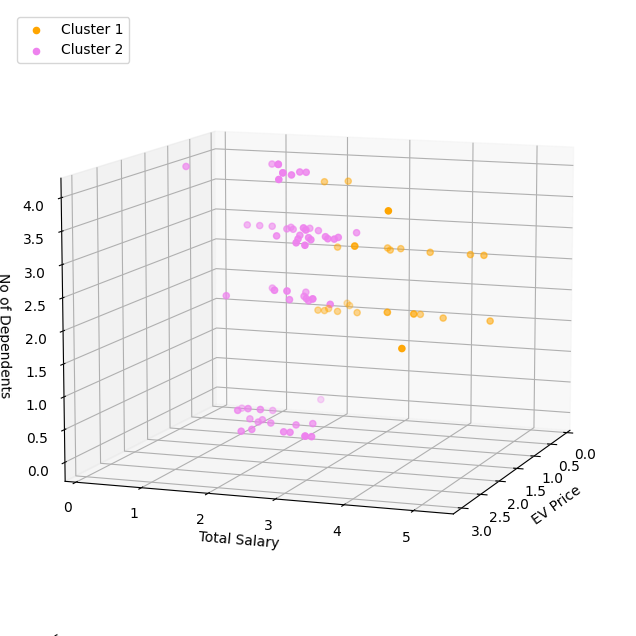

In [32]:
# plotting influence of No of Dependents

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], Cluster_0['No of Dependents'], color='orange', label = 'Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],Cluster_1['No of Dependents'], color='violet', label = 'Cluster 2')
plt.legend(loc = 'upper left')
ax.view_init(10,20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('No of Dependents')
plt.show()

In [33]:
beh_data['No of Dependents'].value_counts()

No of Dependents
3    34
2    29
0    22
4    14
Name: count, dtype: int64

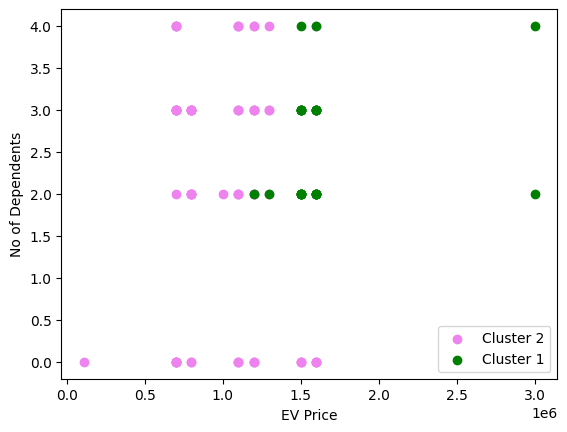

In [34]:
# plotting the effct of no of dependents and ev price on cluster data


plt.scatter(Cluster_1.EV_Price, Cluster_1['No of Dependents'],color='violet', label = 'Cluster 2')
plt.scatter(Cluster_0.EV_Price, Cluster_0['No of Dependents'],color='green', label = 'Cluster 1')
plt.legend(loc="lower right")

plt.xlabel('EV Price')
plt.ylabel('No of Dependents')
plt.show()

# there is a clear difference in segments when comparing salary and the price of EV purchased